In [1]:
from kinetic_measure import *
import plot_property_map as ppm
import pynbody
import numpy as np
import scipy.optimize as so
import scipy.stats as ss
import os


In [11]:
savedir = '/home/seoyoung/analysis/figure/render_rom25/'

#simdir = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/'
simdir = '/scratch/trq/cosmo25/'
param_file = '/scratch/trq/cosmo25/cosmo25p.768sg1bwK1BHe75_v4.param'

filelist = os.listdir(simdir)

In [3]:
result = [i[-6:] for i in filelist if i.startswith('cosmo25p.') and len(i)==31]
result.sort()



In [4]:
filt_size = 35
snap = result[-1] 


data_file = simdir+'cosmo25p.768sg1bwK1BHe75.'+snap
s = pynbody.load(data_file, paramfile = param_file)
s.physical_units()

print("get halos")
h = s.halos()

get halos


In [5]:
group_data = np.loadtxt("/home/seoyoung/analysis/romulus25_group_candidates_z0.txt", dtype = [('id_hal', float), ('mhal', float),('mgal',float)])

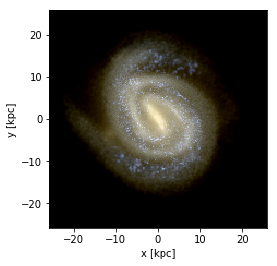

In [16]:
for ids in group_data['id_hal']:
    h0 = h[ids]
    pynbody.analysis.halo.center(h0,mode='hyb')
    s_filt = s[pynbody.filt.Sphere('35 kpc h^-1')]
    
    rgb = pynbody.plot.stars.render(s_filt, width = '35 kpc h^-1', resolution = 200, dynamic_range = 3,plot = True,ret_im = True)
    plt.savefig(savedir+'halo'+str(ids)+'_z'+str(round(s.properties['z'],3))+'_random1.png',bbox_inches = 'tight')
    
    s_filt.rotate_x(90)
    rgb = pynbody.plot.stars.render(s_filt, width = '35 kpc h^-1', resolution = 200, dynamic_range = 3,plot = True,ret_im = True)
    plt.savefig(savedir+'halo'+str(ids)+'_z'+str(round(s.properties['z'],3))+'_random2.png',bbox_inches = 'tight')    
    
    s_filt.rotate_y(90)
    rgb = pynbody.plot.stars.render(s_filt, width = '35 kpc h^-1', resolution = 200, dynamic_range = 3,plot = True,ret_im = True)
    plt.savefig(savedir+'halo'+str(ids)+'_z'+str(round(s.properties['z'],3))+'_random3.png',bbox_inches = 'tight')

In [21]:
group_data['id_hal'][np.argsort(group_data['mhal'])]

array([8.3200e+04, 3.3188e+04, 3.6816e+04, 9.8808e+04, 8.7235e+04,
       3.0900e+04, 7.4833e+04, 9.0266e+04, 6.6689e+04, 1.0000e+00,
       3.4449e+04, 9.7408e+04, 7.7876e+04, 1.3455e+04, 9.1655e+04,
       1.2410e+03, 3.9963e+04, 8.7956e+04, 2.7666e+04, 8.1595e+04,
       6.7526e+04, 9.7045e+04, 4.9047e+04, 1.4620e+04, 3.8182e+04,
       8.9615e+04, 9.9966e+04, 4.2778e+04, 1.8714e+04, 6.1270e+04,
       7.9654e+04, 4.9510e+04, 8.2151e+04, 6.5502e+04, 5.2024e+04])

In [23]:
group_data['mhal'][np.argsort(group_data['mhal'])]

array([12.08155251, 12.08438587, 12.120924  , 12.13268375, 12.148592  ,
       12.19882488, 12.21833229, 12.21952248, 12.22027969, 12.23069954,
       12.25609016, 12.26734829, 12.3332634 , 12.35261345, 12.35497856,
       12.37630463, 12.41743374, 12.44906044, 12.49175358, 12.52689457,
       12.53199673, 12.54489803, 12.56267262, 12.56532574, 12.64347649,
       12.71069908, 12.8140192 , 12.84737301, 12.85447216, 12.91886711,
       12.97949123, 13.0691576 , 13.10718441, 13.24502563, 13.25165367])